<h2>Домашнее задание №8</h2>
<h3>Емельянов Виталий, 293 гр.<br/>

1) Построить регрессию Y=X_0 по X_1,..,X_5 избавившись от мультиколлинеарности.

In [312]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
%matplotlib inline


def regression(X, Y):
    """Calculate linear regression coefficients"""
    X = np.matrix(X)
    if X.shape[0] == 1:
        X = X.transpose()
    Y = np.matrix(Y).transpose()
    n = X.shape[0]
    A = np.matrix(np.column_stack((np.ones(n), X)))
    w = np.linalg.inv(A.transpose() * A) * A.transpose() * Y
    return w

def plot_regression_line(X, Y):
    """Plot 2-d line predicted by linear regression"""
    t = np.linspace(X.min(), X.max(),100)
    T = np.matrix(np.column_stack((np.ones(t.shape[0]), t)))
    w = regression(X, Y)
    print 'Coefs =', w
    _=plt.figure(figsize=(10, 7))
    _=plt.scatter(X, Y, marker='.', alpha=0.5, color='black')
    _=plt.plot(t, T * w, color='red') 

def r(x, y, w):
    """Coefficient of determination R^2"""
    X = np.matrix(np.column_stack((np.ones(x.shape[0]), x)))
    return pearson(X*w, y)

In [313]:
def genCorrCoef(cX, cY):
    n = cX.shape[0]
    numerator = 0.
    denom1 = 0.
    denom2 = 0.
    for j in xrange(n):
        i = 0
        while i < j:
            numerator += cX[i, j] * cY[i, j]
            denom1 += (cX[i, j])**2 
            denom2 += (cY[i, j])**2
            i += 1
    return numerator / (denom1 * denom2)**(1./2)

def pearson(X, Y):
    """Pearson correlatoin coeffient"""
    n = X.shape[0]
    cX = np.matrix(np.zeros((n, n)))
    cY = np.matrix(np.zeros((n, n)))
    for i in xrange(n):
        j = 0
        while j < i:
            cX[i, j] = X[j] - X[i]
            cX[j, i] = -cX[i, j]
            cY[i, j] = Y[j] - Y[i]
            cY[j, i] = -cY[i, j]
            j += 1
    r = genCorrCoef(cX, cY)
    return r

In [314]:
data = np.genfromtxt("W08_030_1.csv", delimiter=',')
x = data[:, 1:]
y = data[:, 0]
print x.shape

(500, 5)


Устраним мультиколлинеарность, посчитав VIF(c_j)

In [315]:
X = np.matrix(x[:,1:])
Y = x[:,0]
w = regression(X, Y)
print 'vif=', 1./ ( 1 - r(X, Y,w))

vif= 289.24590599


vif > 4  - отбрасываем признак.

In [316]:
x = x[:,1:]
print x.shape

(500, 4)


In [317]:
X = np.matrix(x[:,1:])
Y = x[:,0]
w = regression(X, Y)
print 'vif=', 1./ ( 1 - r(X, Y,w))

vif= 4.50359962737e+15


vif > 4  - отбрасываем признак.

In [318]:
x = x[:,1:]
X = np.matrix(x[:,1:])
Y = x[:,0]
w = regression(X, Y)
print 'vif=', 1./ ( 1 - r(X, Y,w))

vif= 3.87831997814


vif < 4, оставляем

In [319]:
X = np.hstack((np.matrix(x[:,0]).transpose(), np.matrix(x[:, 2]).transpose()))
Y = x[:, 1]
w = regression(X, Y)
print 'vif=', 1./ (1 - r(X, Y,w))

vif= 1.01890012992


In [320]:
X = x[:,0:2]
Y = x[:, 2]
w = regression(X, Y)
print 'vif=', 1./ (1 - r(X, Y,w))

vif= 3.87935533409


Построим регресию на оставшихся признаках

In [321]:
w = regression(x, y)
print w

[[  4.39462485]
 [ -2.16466351]
 [  3.48610673]
 [ 11.77827645]]


Хорошо, регрессию построили. Так как 3.87 близок к 4 попробуем пойти дальше, отбросив и этот признак

In [322]:
x = x[:,1:]
x.shape

(500, 2)

In [323]:
X = x[:,1]
Y = x[:,0]
w = regression(X, Y)
print 'vif=', 1./ ( 1 - r(X, Y,w))

vif= 1.01783554796


Оставляем

In [324]:
X = x[:,0]
Y = x[:,1]
w = regression(X, Y)
print 'vif=', 1./ ( 1 - r(X, Y,w))

vif= 1.01783554796


Построим регрессию теперь на этих двух признаках

In [325]:
w = regression(x, y)
print w

[[ 5.58412208]
 [ 3.49506237]
 [ 8.36509486]]


2) Построить ядерную регрессию Y=X_0 по X_1.


In [326]:
def gaussianKernel(x, h):
    res= []
    for xi in x:
        val =  1. / (np.sqrt(2)*np.pi) * np.exp(-x**2 / 2/h**2)
        res.append(val)
    return res


def epanechnikovKernel(x, h):
    res = []
    for xi in x:
        val = 1 - xi**2 / h**2
        if val >= 0:
            res.append(val)
        else:
            res.append(0.)
    return res
    
    
def m(x, X, Y, kernel='epanechnikov', h=0.3):
    y = []
    for xi in x:
        if kernel == 'epanechnikov':
            numerator = np.sum(epanechnikovKernel(xi - X, h)*Y)
            denominator = np.sum(epanechnikovKernel(xi - X, h))
        elif kernel == 'gaussian':
            numerator = np.sum(gaussianKernel(xi - X, h)*Y)
            denominator = np.sum(gaussianKernel(xi - X, h))
        y.append(float(numerator) / denominator)
    return np.array(y)
    

In [327]:
data = np.genfromtxt("W08_030_2.csv", delimiter=',')
print data.shape
X = data[:, 1]
Y = data[:, 0]

(500, 2)


Воспользуемся ядерной оценкой Надарая-Ватсона для различных ядер

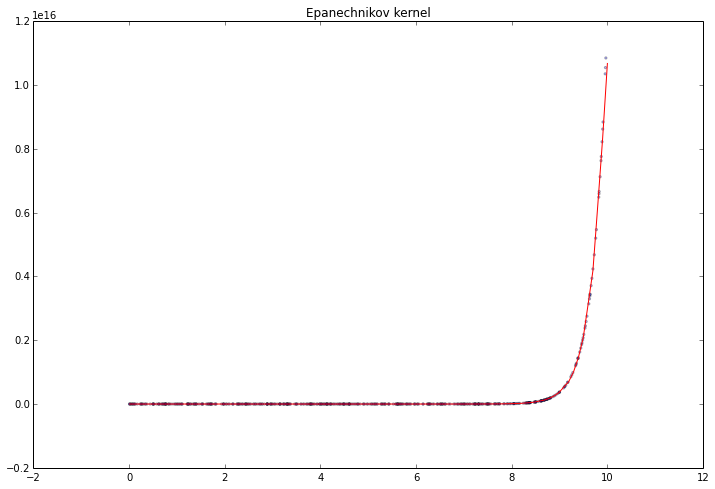

In [328]:
x = np.linspace(0.01, 10, 100)
y = m(x, X, Y, kernel='epanechnikov', h=0.05)
_=plt.figure(figsize=(12, 8))
_=plt.plot(x, y, color='red')
_=plt.scatter(X, Y, marker='.', alpha=0.3 )
_=plt.title('Epanechnikov kernel')

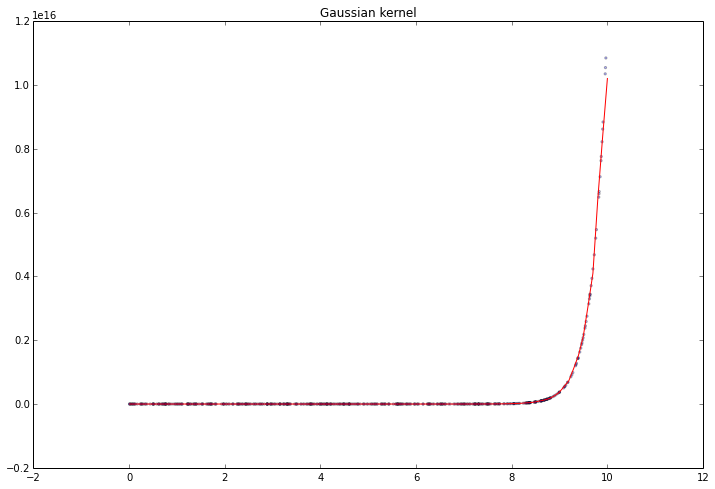

In [329]:
x = np.linspace(0.01, 10, 100)
y = m(x, X, Y, kernel='gaussian', h=0.05)
_=plt.figure(figsize=(12, 8))
_=plt.plot(x, y, color='red')
_=plt.scatter(X, Y, marker='.', alpha=0.3 )
_=plt.title('Gaussian kernel')

Оба ядра при соотвествующих h дают визуально хорошие результаты

3) Разбить выборку на кластеры методами кластерного анализа, вычислить центры кластеров

In [367]:
import numpy as np
import random
 
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

In [368]:
X = np.genfromtxt("W08_030_3.csv", delimiter=',')
print X.shape

(500, 3)


Посмотрим на данные в трех проекциях

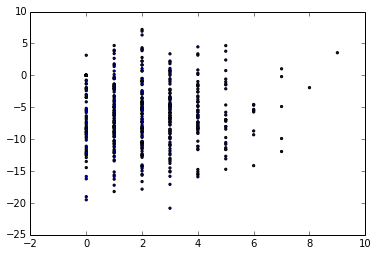

In [369]:
_=plt.scatter(X[:,0], X[:,1], marker='.')

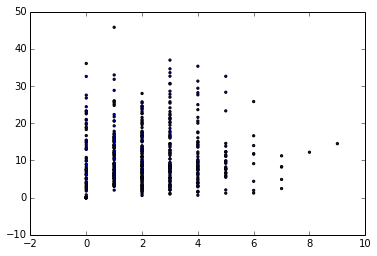

In [370]:
_=plt.scatter(X[:,0], X[:,2], marker='.')

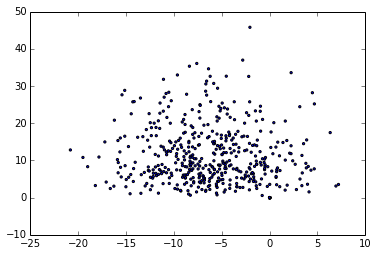

In [371]:
_=plt.scatter(X[:,1], X[:,2], marker='.')

Логично предположить, что здесь 9-10 "плоских" кластеров 

Воспользуемся алгоритмом k-means:

In [377]:
(mu, clusters) = find_centers(X, 10)

In [378]:
for el in clusters.values():
    print len(el)

56
16
52
40
64
77
56
29
74
36


In [379]:
import numpy as np


CLUSTER = dict()
for i in xrange(len(clusters)):
    mat= np.matrix(clusters[i][0])
    for el in clusters[i]:
        mat = np.vstack((mat, el))
    CLUSTER[i] = mat

Посмотрим, что получилось

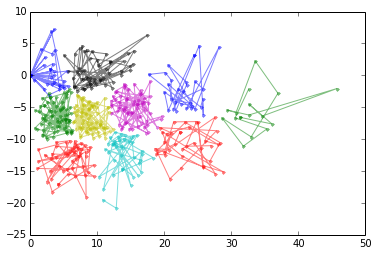

In [380]:
for i  in xrange(10):
    plt.plot(CLUSTER[i][:,2], CLUSTER[i][:, 1], alpha=0.5, marker='.')

В этой проекции выглядит неплохо. Но в двух других проекциях все намного хуже.<br/> 
(К сожалению, не смог построить график так, чтобы точки разных кластеров были разного цвета. Только соединив линиями получилось. Но разглядеть можно)

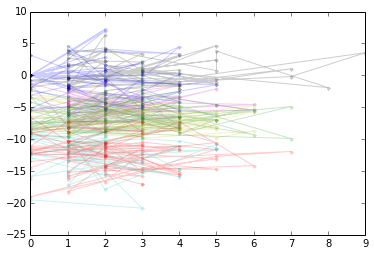

In [381]:
for i  in xrange(10):
    plt.plot(CLUSTER[i][:,0], CLUSTER[i][:, 1], alpha=0.2, marker='.')

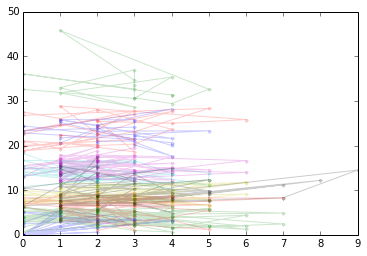

In [382]:
for i  in xrange(10):
    plt.plot(CLUSTER[i][:,0], CLUSTER[i][:, 2], alpha=0.2, marker='.')

Видно, что k-means не годится для этой задачи. 

По-честному, нужно было либо взять другой алгоритм, либо применить алгоритм снижения размерности. Но, так как здесь и так все "видно", cнизим размерность "вручную", оставим только 1-й столбец в данных.

In [383]:
X = X[:, 0]
print X.shape

(500,)


In [395]:
print X[:12]

[ 2.  3.  1.  3.  3.  4.  5.  1.  2.  1.  0.  4.]


Видно, что здесь целые числа, поэтому центрами кластеров будут

In [394]:
set(X)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}